<a href="https://colab.research.google.com/github/GMBrandao/FaculdadeInteligenciaArtificial/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Função para construir o gerador
# O gerador recebe ruído como entrada e gera dados que imitam dados reais
def build_generator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),  # Camada densa com 16 neurônios e função de ativação ReLU
        layers.Dense(1)  # Camada de saída gerando um valor (dado falso)
    ])
    return model

# Função para construir o discriminador
# O discriminador recebe dados como entrada e tenta classificá-los como reais ou falsos
def build_discriminator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),  # Camada densa com 16 neurônios e função de ativação ReLU
        layers.Dense(1, activation='sigmoid')  # Camada de saída com um neurônio e ativação sigmoide para classificação binária
    ])
    return model

# Criando o modelo do gerador
generator = build_generator()

# Criando o modelo do discriminador
discriminator = build_discriminator()

# Compilando o discriminador com otimizador Adam e função de perda binária (binary_crossentropy)
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Desativando o treinamento do discriminador ao treinar a GAN, pois o discriminador não deve ser atualizado diretamente neste passo
discriminator.trainable = False

# Construindo a rede GAN que consiste no gerador seguido do discriminador
gan = Sequential([generator, discriminator])

# Compilando a GAN com o otimizador Adam e função de perda binária
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Dados reais que o discriminador usará para aprender a diferenciar dos dados gerados
real_data = np.array([[6.0], [7.0], [8.0]])

# Rótulos correspondentes aos dados reais (todos iguais a 1, indicando que são reais)
labels_real = np.ones((3, 1))

# Rótulos correspondentes aos dados falsos (todos iguais a 0, indicando que são falsos)
labels_fake = np.zeros((3, 1))

# Número de épocas de treinamento e tamanho do lote (batch_size)
epochs = 10
batch_size = 3

# Loop de treinamento da GAN
for epoch in range(epochs):
    # Gerando dados falsos com o gerador a partir de ruído aleatório (ruído gaussiano)
    noise = np.random.normal(0, 1, (batch_size, 1))
    generated_data = generator.predict(noise)

    # Treinando o discriminador usando dados reais (rotulados como 1) e falsos (rotulados como 0)
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

    # Gerando novos dados falsos para treinar o gerador
    noise = np.random.normal(0, 1, (batch_size, 1))

    # Treinando o gerador (combinado na GAN) para tentar enganar o discriminador,
    # ou seja, o gerador tenta produzir dados que o discriminador classificaria como reais (rótulos reais)
    gan_loss = gan.train_on_batch(noise, labels_real)

    # A cada 100 épocas (aqui, na verdade, nunca imprimirá porque temos apenas 10 épocas), exibe as perdas
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")

# Após o treinamento, gera 5 novos números falsos usando o gerador
noise = np.random.normal(0, 1, (5, 1))
generated_numbers = generator.predict(noise)
print("Números gerados:", generated_numbers)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 0, Loss D Real: 0.673711359500885, Loss D Fake: 0.6846523284912109, Loss G: [array(0.6846523, dtype=float32), array(0.6846523, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Números gerados: [[ 0.0470876 ]
 [-0.27127618]
 [ 0.28075498]
 [ 0.08815493]
 [ 0.21212074]]


Neste exemplo, usaremos o conjunto de dados MNIST, que contém imagens de dígitos manuscritos, para treinar a GAN a gerar imagens semelhantes.

Passos do Código:
Construir o Gerador e o Discriminador.
Definir o Modelo GAN.
Treinar a GAN.
Gerar e Visualizar Imagens.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Epoch 0, D Loss Real: 0.41992098093032837, D Loss Fake: 0.5802206993103027, G Loss: [array(0.5802207, dtype=float32), array(0.5802207, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


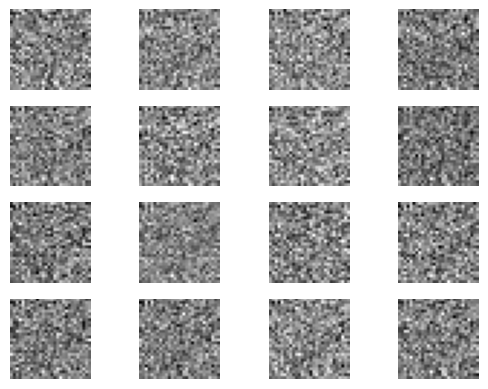

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados nor
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalizar para o intervalo [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar a dimensão do canal

# Parâmetros
batch_size = 64
epochs = 100
latent_dim = 100

# Construir o Gerador
def build_generator():
    model = Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Construir o Discriminador
def build_discriminator():
    model = Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Construir o GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

# Instanciar o Gerador e o Discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Instanciar o GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Treinar a GAN
for epoch in range(epochs):
    # Treinar o Discriminador
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Treinar o Gerador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")
        # Gerar e visualizar imagens
        noise = np.random.normal(0, 1, (16, latent_dim))
        generated_images = generator.predict(noise)
        generated_images = (generated_images + 1) / 2.0  # Reverter a normalização

        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()

